In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# Geting 5 samples from dataset
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3573,FDR48,11.65,LF,0.131709,Baking Goods,152.3024,OUT049,1999,Medium,Tier 1,Supermarket Type1,1518.0240
3276,FDP59,20.85,Regular,0.094512,Breads,104.5648,OUT010,1998,NaN,Tier 3,Grocery Store,207.7296
5733,FDU44,12.15,Regular,0.058664,Fruits and Vegetables,164.1552,OUT018,2009,Medium,Tier 3,Supermarket Type2,3249.1040
6829,FDK28,NaN,Low Fat,0.065272,Frozen Foods,256.1646,OUT027,1985,Medium,Tier 3,Supermarket Type3,3349.6398
3883,FDG32,19.85,Low Fat,0.175962,Fruits and Vegetables,223.0772,OUT035,2004,Small,Tier 2,Supermarket Type1,1779.0176


In [5]:
# Shape of the dataset (rows,columns)
data.shape

(8523, 12)

In [6]:
# Information about dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
# Checking Null Values in Dataset
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Percentage of null values
perc = ( data.isnull().sum() * 100 ) / len(data)
print(perc)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [9]:
# Checking duplicate values
data.duplicated().any()

False

We have missing values in column Item_Weight and Outlet_Size

In [10]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [11]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

We can use Univariate and Multivariate Imputation to handle missing values

### Univariate Imputation - Mean & Median

In [12]:
mean_weight = data['Item_Weight'].mean()

median_weight = data['Item_Weight'].median()

In [13]:
print('Mean Weight : ', mean_weight)

print('Median Weight : ', median_weight)

Mean Weight :  12.857645184135976
Median Weight :  12.6


In [14]:
data['Item_Weight_mean'] = data['Item_Weight'].fillna(mean_weight)

data['Item_Weight_median'] = data['Item_Weight'].fillna(median_weight)

In [15]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
485,FDN48,NaN,Low Fat,0.064636,Baking Goods,90.0804,OUT027,1985,Medium,Tier 3,Supermarket Type3,2113.2492,12.857645,12.600
4110,FDS46,17.600,Regular,0.047450,Snack Foods,118.1782,OUT018,2009,Medium,Tier 3,Supermarket Type2,2621.9204,17.600000,17.600
789,FDE02,8.710,low fat,0.121149,Canned,93.7778,OUT013,1987,High,Tier 3,Supermarket Type1,1783.6782,8.710000,8.710
7805,NCC54,17.750,Low Fat,0.097692,Health and Hygiene,242.4196,OUT035,2004,Small,Tier 2,Supermarket Type1,5543.4508,17.750000,17.750
5319,FDW12,8.315,Regular,0.035543,Baking Goods,143.3444,OUT013,1987,High,Tier 3,Supermarket Type1,1596.5884,8.315000,8.315


In [16]:
# Checking the variance of previous and new data entries

print("Original Weight variable variance is",data['Item_Weight'].var())

print("Item Weight variance after mean imputation is",data['Item_Weight_mean'].var())

print("Item Weight variance after median imputation is",data['Item_Weight_median'].var())

Original Weight variable variance is 21.56168825983637
Item Weight variance after mean imputation is 17.860121735060453
Item Weight variance after median imputation is 17.869561454073366


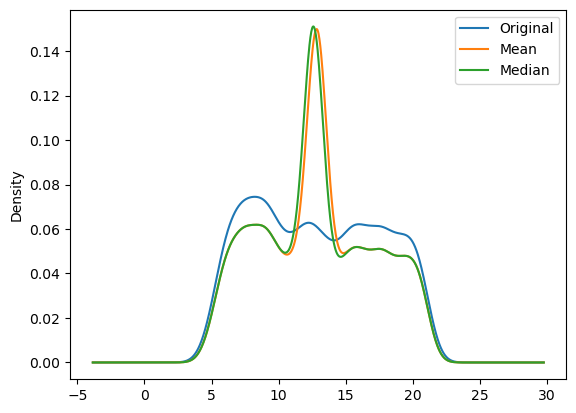

In [17]:
# # Checking the variance difference through visualization

data['Item_Weight'].plot(kind="kde",label="Original")

data['Item_Weight_mean'].plot(kind="kde",label="Mean")

data['Item_Weight_median'].plot(kind="kde",label="Median")

plt.legend()
plt.show()

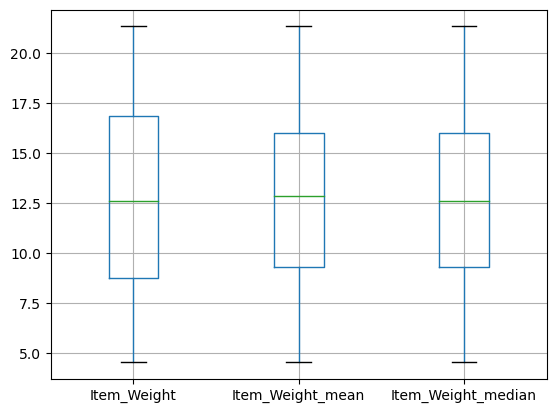

In [18]:
# Checking distribution in percentile

data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

plt.show()

### Univariate Imputation - Linear Interpolation

In [19]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interploate
3060,NCP18,12.15,Low Fat,0.028656,Household,149.3708,OUT045,2002,NaN,Tier 2,Supermarket Type1,1203.7664,12.15,12.15,12.15
3151,NCO30,19.50,Low Fat,0.015814,Household,183.2608,OUT017,2007,NaN,Tier 2,Supermarket Type1,2940.1728,19.50,19.50,19.50
1930,DRD24,13.85,Low Fat,0.030769,Soft Drinks,141.7154,OUT013,1987,High,Tier 3,Supermarket Type1,2978.1234,13.85,13.85,13.85
7321,FDJ60,19.35,Regular,0.062626,Baking Goods,165.3184,OUT049,1999,Medium,Tier 1,Supermarket Type1,1651.1840,19.35,19.35,19.35
6079,FDH28,15.85,Regular,0.110010,Frozen Foods,38.8506,OUT035,2004,Small,Tier 2,Supermarket Type1,341.5554,15.85,15.85,15.85


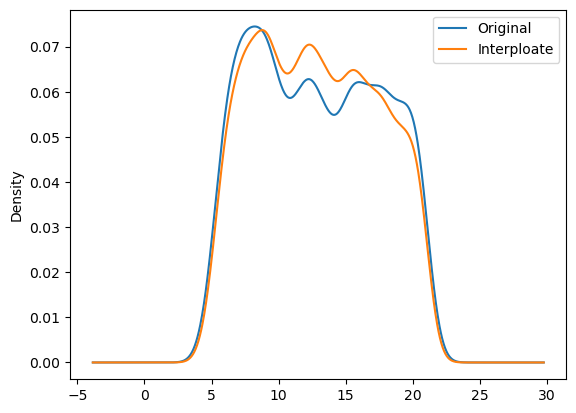

In [20]:
# Checking Variance and Distribution of data

data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "Interploate")

plt.legend()
plt.show()

### Multivariate Imputaion - KNN Imputer

In [21]:
from sklearn.impute import KNNImputer

In [22]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [23]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

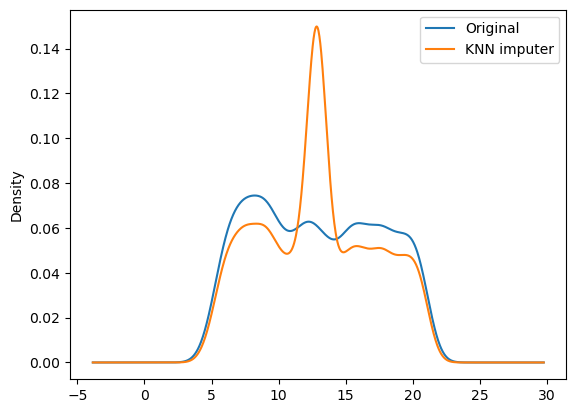

In [24]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

It is found that only Linear Interpolation method resulted in similar variance and distribution as compared to original data column i.e. Item_Weight. Hence droping all non usable columns.

In [25]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer'],axis=1)

In [26]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3


In [27]:
# Again confirming the null values for Item_Weight

data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

Now handling Outlet_Size column for missing values. As the column's data is categorical. Therefore

In [28]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [29]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [30]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x : x.mode()[0]))

In [31]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [32]:
missing_values = data['Outlet_Size'].isnull()

In [33]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [34]:
# Assign respective Outlet_Size using Mode_Outlet function by comparing Outlet_Type

data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [35]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

Finally all the missing values has been eliminated.